In [1]:
# Install required module (if not exists)
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn --upgrade
!{sys.executable} -m pip install scikit-learn

In [2]:
# Import required libraries in this lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# **Datascience Lab 11**

In [3]:
# Data preperation
df_titanic = pd.read_csv('Titanic.csv', index_col=0) # load the csv file
df_titanic = df_titanic[df_titanic['PClass'] != '*'] # clear the abnormal data from PClass
df_titanic = df_titanic.dropna() # drop NA rows for cleaner data

df_bluejay = pd.read_csv('blue_jays.csv', index_col=0) # load the csv file

## Lab 11-1: Bar graphs with error bars (1 point)

For this assignment, you will be working with the `Titanic.csv` dataset already loaded into a DataFrame object called `df_titanic`.

* You need to create four bar graphs that display the distribution of ages for men and women in each class of the Titanic passengers.
* Use different error bars for each plot: standard deviation (sd), standard error (se), 95% confidence interval (ci, 95), and 99% confidence interval (ci, 99).
* Create a 1x4 grid of subplots using plt.subplots(ncols=4, figsize=(16, 5)).
* Add the bar graphs to the subplots, with the corresponding titles

### Reference
* https://seaborn.pydata.org/generated/seaborn.barplot.html
* https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

In [4]:
# USE df_titanic in this practice.
df_titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


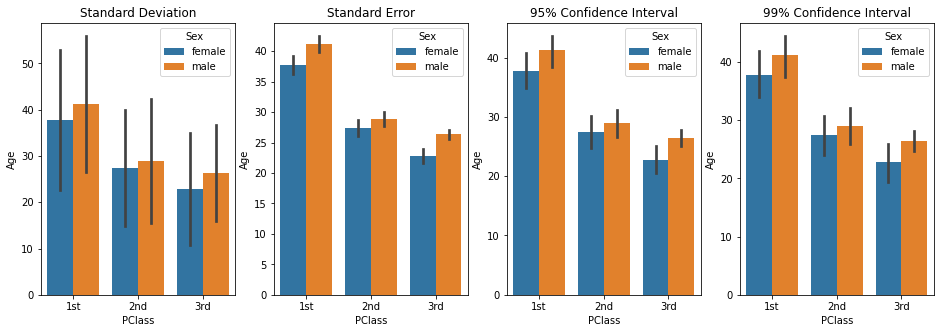

In [5]:
### -------- LAB 11-1 -------- ###
fig, axes = plt.subplots(ncols=4, figsize=(16, 5))

sns.barplot(ax=axes[0],data=df_titanic,x='PClass',y='Age',hue='Sex',errorbar='sd')
axes[0].set_title('Standard Deviation')

sns.barplot(ax=axes[1],data=df_titanic,x='PClass',y='Age',hue='Sex',errorbar='se')
axes[1].set_title('Standard Error')

sns.barplot(ax=axes[2],data=df_titanic,x='PClass',y='Age',hue='Sex',errorbar=('ci',95))
axes[2].set_title('95% Confidence Interval')

sns.barplot(ax=axes[3],data=df_titanic,x='PClass',y='Age',hue='Sex',errorbar=('ci',99))
axes[3].set_title('99% Confidence Interval')

plt.show()

## Lab 11-2: Confidence Bands for Scatter Plots (1 point)

For this assignment, you will be working with the `bluejay.csv` dataset already loaded into a DataFrame object called `df_bluejay`. 

* You need to create a scatter plot that displays the relationship between BillDepth and BillWidth for the Bluejay dataset.
* Use seaborn's `regplot` function to draw a linear regression model with a confidence band.
* Customize the appearance of the scatter plot, such as marker style, color, and alpha (transparency) if you want.
* Set the title of the plot as `Bill Depth vs Bill Width`.

### Reference
* https://seaborn.pydata.org/generated/seaborn.regplot.html

In [6]:
# USE df_bluejay in this practice.
df_bluejay.head()

,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1


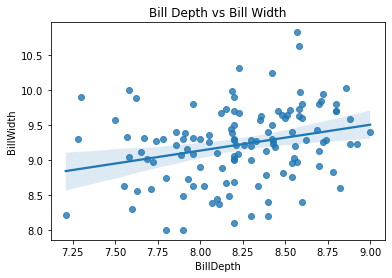

In [7]:
### -------- LAB 11-2 START -------- ###

sns.regplot(data=df_bluejay, x='BillDepth', y='BillWidth')

plt.title('Bill Depth vs Bill Width')

plt.show()

## Lab 11-3: Regression Analysis and R-squared Value for Bluejay Dataset (1 point)

For this assignment, you will be working with the `bluejay.csv` dataset already loaded into a DataFrame object called `df_bluejay`.

* You need to create a scatter plot that displays the relationship between BillDepth and BillWidth for the Bluejay dataset.
* Use seaborn's `regplot` function to draw a linear regression model with a confidence band.
* Customize the appearance of the scatter plot, such as marker style, color, and alpha (transparency).
* Set the title of the plot as `Regression Analysis: Bill Depth vs Bill Width`.
* Calculate the R-squared value for the linear regression fit and display it in the plot.

### Reference
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html
* https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [8]:
# USE df_bluejay in this practice.
df_bluejay.head()

,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1


slope:0.20726622611599957, intercept=40.86214532411758
R-squared: 0.396


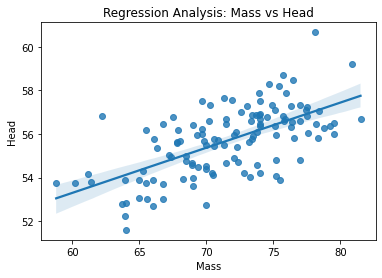

In [9]:
### -------- LAB 11-3 START -------- ###

sns.regplot(data=df_bluejay, x='Mass', y='Head')

plt.title('Regression Analysis: Mass vs Head')



# Extract the 'Mass' and 'Head' columns as x and y from the DataFrame
x = df_bluejay['Mass']
y = df_bluejay['Head']


# Use numpy's polyfit function to get the slope and intercept of the fitted line
slope, intercept = np.polyfit(x,y,deg=1)

# Calculate the predicted values for 'Head' using the fitted line
y_pred = slope * x + intercept

# Calculate the R-squared value using sklearn's r2_score function
r_squared = r2_score(y_true=y,y_pred=y_pred)

# Print the Slope and intercept
print(f'slope:{slope}, intercept={intercept}')
# Print the R-squared value
print(f'R-squared: {r_squared:.3f}')

plt.show()

## Lab 11-4: Rgression Analysis in JASP

Now install JASP (https://jasp-stats.org/), load `bluejay.csv`, and and redo the Lab 11-3.
Check the calculated slope, intercept, and R^2 values are identical to the 11-3.

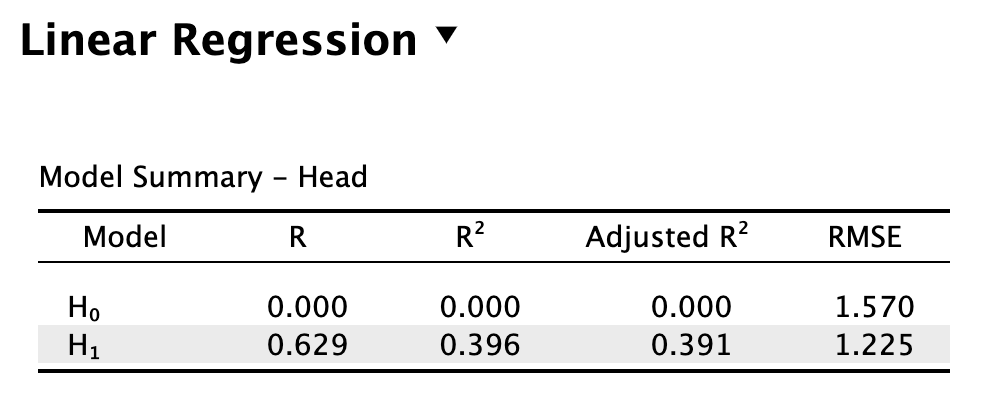
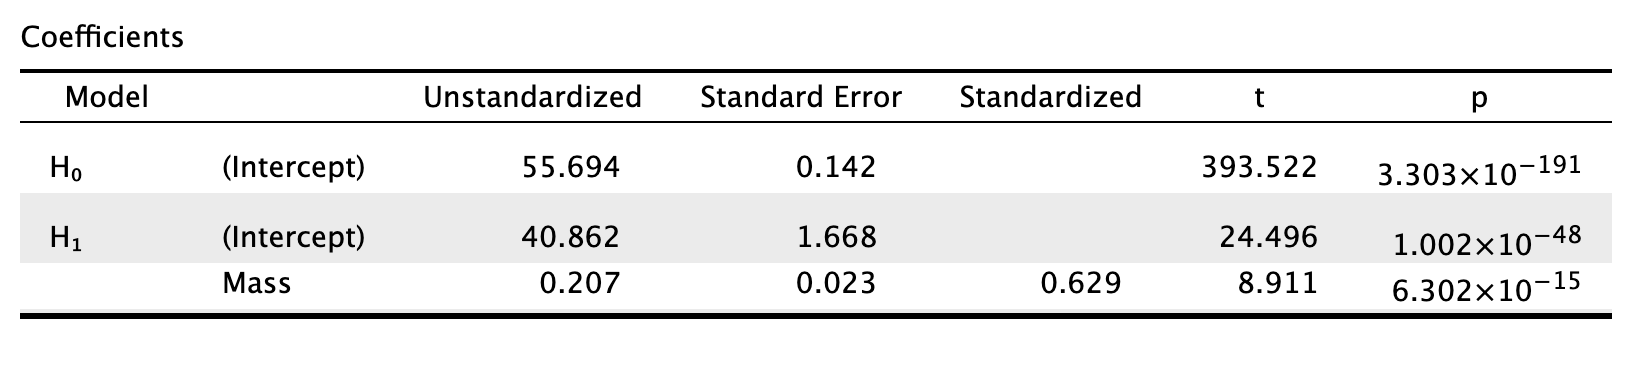